In [1]:
### Auteur : jakbay
### NB: on s'est rendu compte qu'on s'était emmêlé les pinceaux et que l'éclipse "secondaire" dans le filtre vert était en réalité
### une primaire et que les deux éclipses avec le filtre rouge étaient des secondaires.
### J'ai changé les titres des graphiques mais n'ai pas changé les noms de variables pour éviter de faire encore plus d'erreurs.
### ****_sec_g => éclipse primaire, filtre vert
### ****_pri_r => éclipse secondaire, filtre rouge
### ****_sec_r => autre éclipse secondaire, filtre rouge

# Ajustement des données

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from astropy.time import Time
from scipy import optimize
%matplotlib inline

<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [4]:
df_obs_sec_g = pd.read_csv('./obs_sec_g_light_curve_data.csv').sort_values('observation_date')
df_bl23 = pd.read_csv('./baseline_23_c_light_curve_data.csv').sort_values('observation_date')
df_obs_sec_r = pd.read_csv('./obs_sec_r_c_light_curve_data.csv').sort_values('observation_date')
df_bl24 = pd.read_csv('./baseline_24_c_light_curve_data.csv').sort_values('observation_date')
df_obs_pri_r = pd.concat([df_bl24, pd.read_csv('./obs_pri_r_c_light_curve_data.csv').sort_values('observation_date')])

column_names = df_obs_sec_g.columns.tolist()
print(column_names)

['observation_date', 'target_intensity', 'target_intensity_uncertainties', 'reference_intensity', 'reference_intensity_uncertainties', 'normalized_intensity', 'normalized_intensity_uncertainties', 'filter']


In [5]:
# Convertit les modified julian day en iso time
def mjd_conversion(mjd_arr):
    return Time(mjd_arr, format='jd').iso

In [6]:
# Utilisé dans les plots ne contenant que des données afin d'éviter trop de copier/coller
def plot_wrapper(data_array, title, x_lbl, y_lbl, legend_loc='upper right', output_filename=''):
    for line in data_array:
        plt.scatter(line[0], line[1], label=line[2], color=line[3], marker=line[4])
    plt.title(title)
    plt.xlabel(x_lbl)
    plt.ylabel(y_lbl)
    plt.legend(loc=legend_loc)
    if output_filename != '':
        plt.savefig(output_filename)
    plt.show()

On charge et on affiche chacun des jeux de données, tout en extrayant quelques informations.

Filter:  g'
Date:    2024-09-24 18:26:41.210
0.08341513035052246
0.08358841389563683


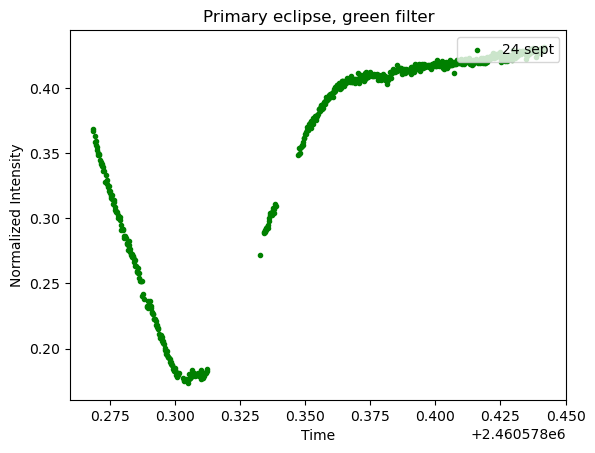

In [8]:
x_sec_g = df_obs_sec_g['observation_date'].to_numpy()
y_sec_g = df_obs_sec_g['normalized_intensity'].to_numpy()
y_sec_g_err = np.sqrt(df_obs_sec_g['normalized_intensity_uncertainties'].to_numpy()**2+np.std(y_sec_g)**2)
print('Filter: ', df_obs_sec_g['filter'].to_numpy()[0])
print('Date:   ', mjd_conversion(x_sec_g)[0])
print(np.std(y_sec_g))
print(np.mean(y_sec_g_err))
plot_wrapper([[x_sec_g, y_sec_g, '24 sept', 'green', '.']],
             'Primary eclipse, green filter', 'Time', 'Normalized Intensity')

Filter:  r'
Date:    2024-09-24 01:23:01.470
0.03456829728361599
0.03500446352485004


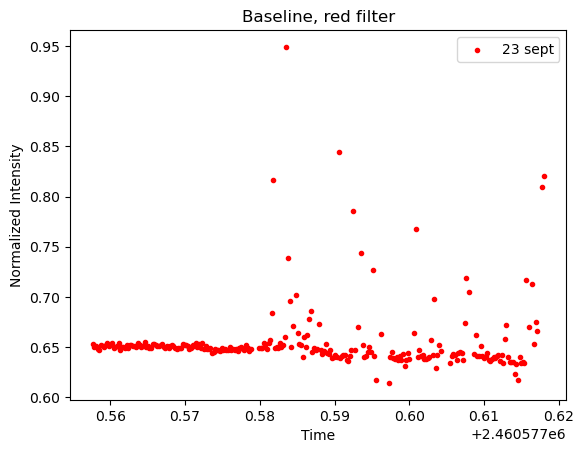

In [9]:
x_bl_23 = df_bl23['observation_date'].to_numpy()
y_bl_23 = df_bl23['normalized_intensity'].to_numpy()
y_bl_23_err = np.sqrt(df_bl23['normalized_intensity_uncertainties'].to_numpy()**2+np.std(y_bl_23)**2)
print('Filter: ', df_bl23['filter'].to_numpy()[0])
print('Date:   ', mjd_conversion(x_bl_23)[0])
print(np.std(y_bl_23))
print(np.mean(y_bl_23_err))

plot_wrapper([[x_bl_23, y_bl_23, '23 sept', 'red', '.']],
             'Baseline, red filter', 'Time', 'Normalized Intensity')

Filter:  r'
Date:    2024-09-23 20:13:21.440
0.04087349711373724
0.04109242895349106


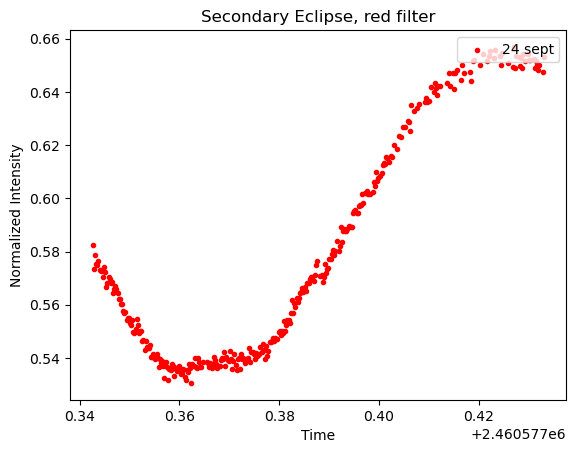

In [10]:
x_sec_r = df_obs_sec_r['observation_date'].to_numpy()[:-3]
y_sec_r = df_obs_sec_r['normalized_intensity'].to_numpy()[:-3]
y_sec_r_err = np.sqrt(df_obs_sec_r['normalized_intensity_uncertainties'].to_numpy()[:-3]**2+np.std(y_sec_r)**2)
print('Filter: ', df_obs_sec_r['filter'].to_numpy()[0])
print('Date:   ', mjd_conversion(x_sec_r)[0])
print(np.std(y_sec_r))
print(np.mean(y_sec_r_err))

plot_wrapper([[x_sec_r, y_sec_r, '24 sept', 'red', '.']],
             'Secondary Eclipse, red filter', 'Time', 'Normalized Intensity')

Filter:  r'
Date:    2024-09-25 01:11:54.780
0.01315484941102382
0.014054683306490134


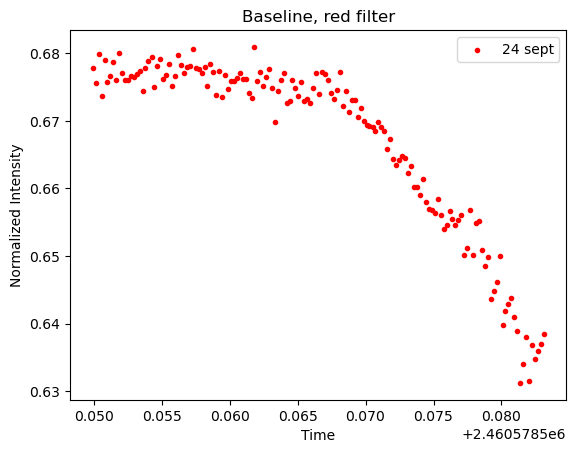

In [11]:
x_bl_24 = df_bl24['observation_date'].to_numpy()
y_bl_24 = df_bl24['normalized_intensity'].to_numpy()
y_bl_24_err = np.sqrt(df_bl24['normalized_intensity_uncertainties'].to_numpy()**2+np.std(y_bl_24)**2)
print('Filter: ', df_bl24['filter'].to_numpy()[0])
print('Date:   ', mjd_conversion(x_bl_24)[0])
print(np.std(y_bl_24))
print(np.mean(y_bl_24_err))
plot_wrapper([[x_bl_24, y_bl_24, '24 sept', 'red', '.']],
             'Baseline, red filter', 'Time', 'Normalized Intensity')

Filter:  r'
Date:    2024-09-25 01:11:54.780
0.048561943428431655
0.04881799870547372


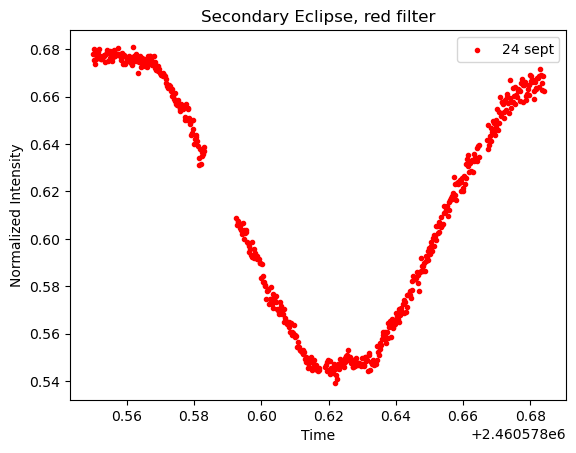

In [12]:
x_pri_r = df_obs_pri_r['observation_date'].to_numpy()
y_pri_r = df_obs_pri_r['normalized_intensity'].to_numpy()
y_pri_r_err = np.sqrt(df_obs_pri_r['normalized_intensity_uncertainties'].to_numpy()**2+np.std(y_pri_r)**2)
print('Filter: ', df_obs_pri_r['filter'].to_numpy()[0])
print('Date:   ', mjd_conversion(x_pri_r)[0])
print(np.std(y_pri_r))
print(np.mean(y_pri_r_err))

plot_wrapper([[x_pri_r, y_pri_r, '24 sept', 'red', '.']],
             'Secondary Eclipse, red filter', 'Time', 'Normalized Intensity')

In [13]:
# Fonction pour ajuster les jeux de données où manque le début de l'éclipse
def eclipse_fit(x, y0, x1, x2, x3, k1, k2, k3):
    x0 = x[0]
    return np.piecewise(x, [(x <= x1) & (x < x2) & (x < x3),
                            (x > x1) & (x <= x2) & (x < x3),
                            (x > x1) & (x > x2) & (x <= x3),
                            (x > x1) & (x > x2) & (x > x3)], 
                        [lambda x:k1*(x-x0) + y0, 
                         lambda x:k1*(x1-x0) + y0,
                         lambda x:k1*(x1-x0) + y0 + k2*(x-x2),
                         lambda x:k1*(x1-x0) + y0 + k2*(x3-x2) + k3*(x-x3)])

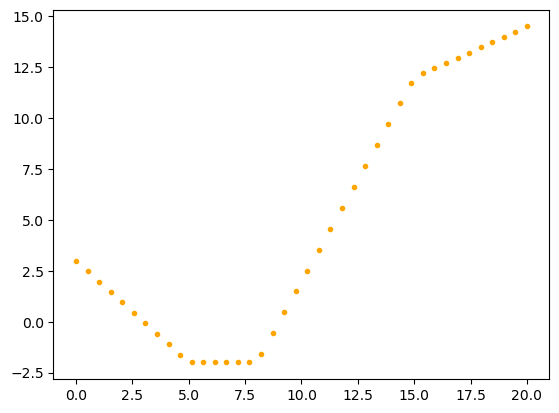

In [14]:
# Petit test de la fonction linéaire par morceaux
x=np.linspace(0, 20, 40)
plt.plot(x, eclipse_fit(x, 3, 5, 8, 15, -1, 2, 0.5), ".", label='data', color='orange')
plt.show()

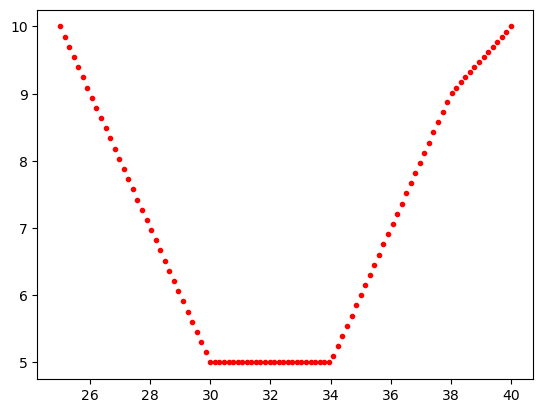

In [15]:
# Petit test de la fonction linéaire par morceaux
x = np.linspace(25, 40, 100)
plt.plot(x, eclipse_fit(x, 10, 30, 34, 38, -1, 1, 0.5), ".", label='data', color='red')
plt.show()

In [16]:
# Fonction pour ajuster le jeu de données où nous avons l'éclipse entière
def eclipse_fit2(x, y0, x1, x2, x3, x4, k1, k2, k3):
    x0 = x[0]
    return np.piecewise(x, [(x <= x1) & (x < x2) & (x < x3) & (x < x4),
                            (x > x1) & (x <= x2) & (x < x3) & (x < x4),
                            (x > x1) & (x > x2) & (x <= x3) & (x < x4),
                            (x > x1) & (x > x2) & (x > x3) & (x <= x4),
                            (x > x1) & (x > x2) & (x > x3) & (x > x4)], 
                        [lambda x:y0,
                         lambda x:k1*(x-x1) + y0, 
                         lambda x:k1*(x2-x1) + y0,
                         lambda x:k1*(x2-x1) + y0 + k2*(x-x3),
                         lambda x:k1*(x2-x1) + y0 + k2*(x4-x3) + k3*(x-x4)])

In [17]:
# On est obligé d'utiliser des variables globales et des fonctions "en dur" car la fonction optimize.differential_evolution
# ne semble pas permettre de faire autrement.
x_arr = 0
y_arr = 0
def error_function(params):
    return np.sum((y_arr - eclipse_fit(x_arr, *params)) ** 2)

def chisquare(x, y, params, func):
    return np.sum(((y_arr - func(x_arr, *params)) ** 2)/y_arr)

In [18]:
x_arr2 = 0
y_arr2 = 0
def error_function2(params):
    return np.sum((y_arr2 - eclipse_fit2(x_arr2, *params)) ** 2)

def chisquare2(x, y, params, func):
    return np.sum(((y_arr2 - func(x_arr2, *params)) ** 2)/y_arr2)

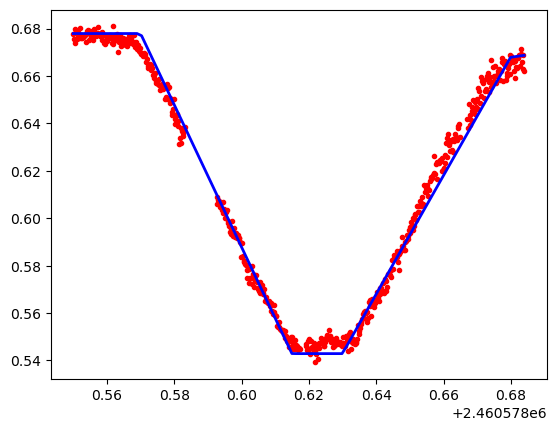

0.01910893785957284


In [19]:
# Pour s'assurer qu'on a bien les bonnes données dans les fonctions
# utilisant des variables globales.
x_arr2 = x_pri_r
y_arr2 = y_pri_r

# On essaie de déterminer des paramètres initiaux manuellement.
fx_pri_r = np.linspace(np.min(x_pri_r), np.max(x_pri_r), 100)

plt.plot(x_pri_r, y_pri_r, ".", label='data', color='red')
params_pri_r = np.array([y_pri_r[0], np.min(x_pri_r)+0.02, np.min(x_pri_r)+0.065, np.min(x_pri_r)+0.08, np.min(x_pri_r)+0.13, -3, 2.5, 0.2])
plt.plot(fx_pri_r, eclipse_fit2(fx_pri_r, *params_pri_r), color='blue', linewidth='2')
plt.show()

print(chisquare2(x_pri_r, y_pri_r, params_pri_r, eclipse_fit2))

[3.79815978e-04 1.40906857e-03 4.05863000e-05 1.75774985e-03
 4.55712814e+03 1.00149554e-01 1.05832186e-01 2.70329455e+05]


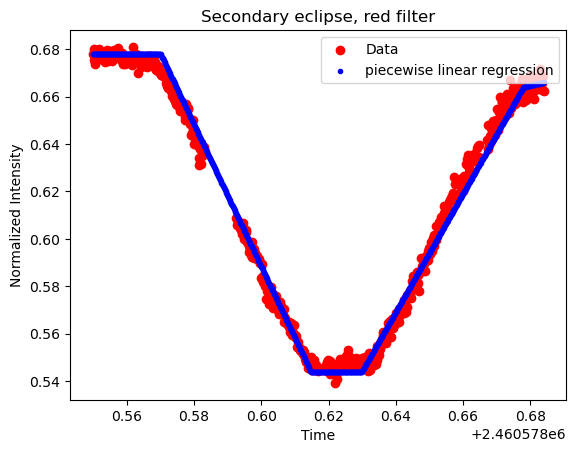

0.017076362452118493


In [20]:
# Pour s'assurer qu'on a bien les bonnes données dans les fonctions
# utilisant des variables globales.
x_arr2 = x_pri_r
y_arr2 = y_pri_r

# On insère les paramètres obtenus manuellement dans l'algorithme, qui fait sa régression linéaire par morceaux
p_pri_r , e_pri_r = optimize.curve_fit(eclipse_fit2, x_pri_r, y_pri_r,
                           sigma=y_pri_r_err, check_finite=True,
                           method='dogbox',
                           nan_policy='omit',
                           bounds=(params_pri_r - 0.5,
                                   params_pri_r + 0.5),
                           maxfev=1000)
perr_pri_r = np.sqrt(np.diag(e_pri_r))
print(perr_pri_r)

fx_pri_r2 = np.linspace(x_pri_r[0], x_pri_r[-1], 1000)
fy_pri_r2 = eclipse_fit2(fx_pri_r2, *p_pri_r)

plot_wrapper([[x_pri_r, y_pri_r, 'Data', 'red', 'o'],
              [fx_pri_r2, fy_pri_r2, 'piecewise linear regression', 'blue', '.']],
             'Secondary eclipse, red filter', 'Time', 'Normalized Intensity', legend_loc='upper right')


print(chisquare2(x_pri_r, y_pri_r, p_pri_r, eclipse_fit2))

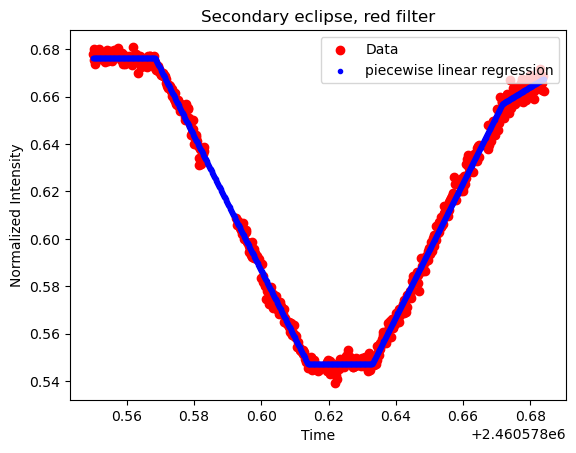

0.006743563170763088


In [21]:
# Pour s'assurer qu'on a bien les bonnes données dans les fonctions
# utilisant des variables globales.
x_arr2 = x_pri_r
y_arr2 = y_pri_r

# On utilise un algorithme génétique pour tenter de trouver le minimum global permettant d'optimiser les paramètres initiaux
initialParams_arr = [[params_pri_r[0]-0.3, params_pri_r[0]+0.3],
                     [params_pri_r[1]-0.5, params_pri_r[1]+0.5],
                     [params_pri_r[2]-0.5, params_pri_r[2]+0.5],
                     [params_pri_r[3]-0.5, params_pri_r[3]+0.5],
                     [params_pri_r[4]-0.5, params_pri_r[4]+0.5],
                     [params_pri_r[5]-3, params_pri_r[5]+3],
                     [params_pri_r[6]-3, params_pri_r[6]+3],
                     [params_pri_r[7]-3, params_pri_r[7]+3]]

initialParams = optimize.differential_evolution(error_function2, initialParams_arr, seed=1).x

# On insère les paramètres obtenus dans l'algorithme, qui fait sa régression linéaire par morceaux
p_pri_r , e_pri_r = optimize.curve_fit(eclipse_fit2, x_pri_r, y_pri_r,
                           sigma=y_pri_r_err, check_finite=True,
                           method='dogbox',
                           nan_policy='omit',
                           p0=initialParams,
                           maxfev=10000)
perr_pri_r = np.sqrt(np.diag(e_pri_r))

fx_pri_r2 = np.linspace(x_pri_r[0], x_pri_r[-1], 1000)
fy_pri_r2 = eclipse_fit2(fx_pri_r2, *p_pri_r)

plot_wrapper([[x_pri_r, y_pri_r, 'Data', 'red', 'o'],
              [fx_pri_r2, fy_pri_r2, 'piecewise linear regression', 'blue', '.']],
             'Secondary eclipse, red filter', 'Time', 'Normalized Intensity', legend_loc='upper right')


print(chisquare2(x_pri_r, y_pri_r, p_pri_r, eclipse_fit2))

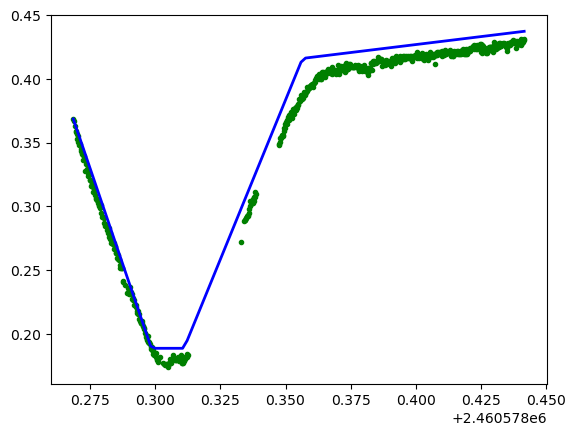

0.27606049666863763


In [22]:
# Pour s'assurer qu'on a bien les bonnes données dans les fonctions
# utilisant des variables globales.
x_arr = x_sec_g
y_arr = y_sec_g

# On essaie de déterminer des paramètres initiaux manuellement car l'algorithme ne veut pas converger.
fx_sec_g2 = np.linspace(x_sec_g[0], x_sec_g[-1], 100)

plt.plot(x_sec_g, y_sec_g, ".", label='data', color='green')
params_sec_g = np.array([y_sec_g[0], x_sec_g[0]+0.03, x_sec_g[0]+0.0425, x_sec_g[0]+0.088, -6, 5, 0.25])
plt.plot(fx_sec_g2, eclipse_fit(fx_sec_g2, *params_sec_g), color='blue', linewidth='2')
plt.show()

print(chisquare(x_sec_g, y_sec_g, params_sec_g, eclipse_fit))

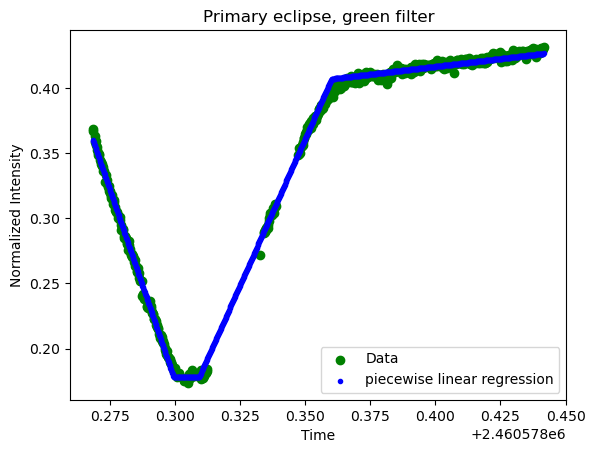

0.022342155484093747


In [23]:
# Pour s'assurer qu'on a bien les bonnes données dans les fonctions
# utilisant des variables globales.
x_arr = x_sec_g
y_arr = y_sec_g

# On insère les paramètres obtenus manuellement dans l'algorithme, qui fait sa régression linéaire par morceaux
p_sec_g , e_sec_g = optimize.curve_fit(eclipse_fit, x_sec_g, y_sec_g,
                                       sigma=y_sec_g_err, check_finite=True,
                                       method='dogbox',
                                       nan_policy='omit',
                                       bounds=(params_sec_g - 0.5,
                                               params_sec_g + 0.5),
                                       maxfev=1000)
perr_sec_g = np.sqrt(np.diag(e_sec_g))

fx_sec_g2 = np.linspace(x_sec_g[0], x_sec_g[-1], 1000)
fy_sec_g2 = eclipse_fit(fx_sec_g2, *p_sec_g)

plot_wrapper([[x_sec_g, y_sec_g, 'Data', 'green', 'o'],
              [fx_sec_g2, fy_sec_g2, 'piecewise linear regression', 'blue', '.']],
             'Primary eclipse, green filter', 'Time', 'Normalized Intensity', legend_loc='lower right')

print(chisquare(x_sec_g, y_sec_g, p_sec_g, eclipse_fit))

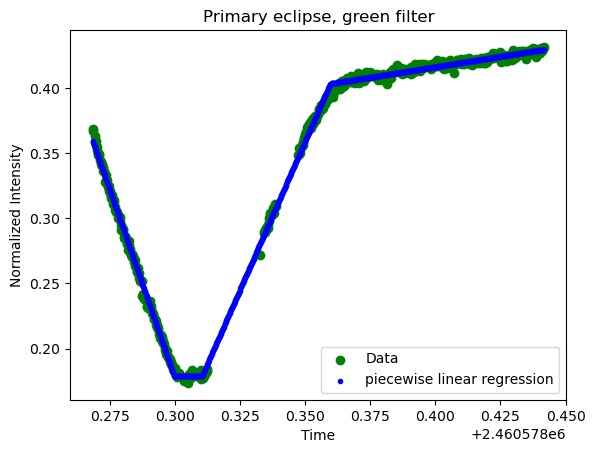

0.014820024127584132


In [24]:
# Pour s'assurer qu'on a bien les bonnes données dans les fonctions
# utilisant des variables globales.
x_arr = x_sec_g
y_arr = y_sec_g

# On utilise un algorithme génétique pour tenter de trouver le minimum global permettant d'optimiser les paramètres initiaux
initialParams_arr = [[params_sec_g[0]-0.3, params_sec_g[0]+0.3],
                     [params_sec_g[1]-0.5, params_sec_g[1]+0.5],
                     [params_sec_g[2]-0.5, params_sec_g[2]+0.5],
                     [params_sec_g[3]-0.5, params_sec_g[3]+0.5],
                     [params_sec_g[4]-3, params_sec_g[4]+3],
                     [params_sec_g[5]-3, params_sec_g[5]+3],
                     [params_sec_g[6]-3, params_sec_g[6]+3]]

initialParams = optimize.differential_evolution(error_function, initialParams_arr, seed=1).x

# On insère les paramètres obtenus dans l'algorithme, qui fait sa régression linéaire par morceaux
p_sec_g , e_sec_g = optimize.curve_fit(eclipse_fit, x_sec_g, y_sec_g,
                           sigma=y_sec_g_err, check_finite=True,
                           method='dogbox',
                           nan_policy='omit',
                           p0=initialParams,
                           maxfev=10000)
perr_sec_g = np.sqrt(np.diag(e_sec_g))

fx_sec_g2 = np.linspace(x_sec_g[0], x_sec_g[-1], 1000)
fy_sec_g2 = eclipse_fit(fx_sec_g2, *p_sec_g)

plot_wrapper([[x_sec_g, y_sec_g, 'Data', 'green', 'o'],
              [fx_sec_g2, fy_sec_g2, 'piecewise linear regression', 'blue', '.']],
             'Primary eclipse, green filter', 'Time', 'Normalized Intensity', legend_loc='lower right')


print(chisquare(x_sec_g, y_sec_g, p_sec_g, eclipse_fit))

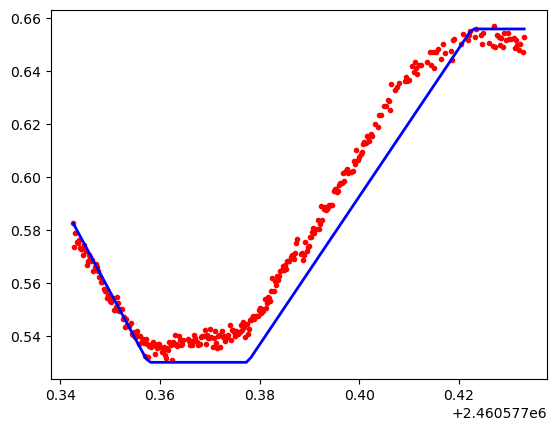

0.06586821494137243


In [25]:
# Pour s'assurer qu'on a bien les bonnes données dans les fonctions
# utilisant des variables globales.
x_arr = x_sec_r
y_arr = y_sec_r

# On essaie de déterminer des paramètres initiaux manuellement car l'algorithme ne veut pas converger.
fx_sec_r = np.linspace(x_sec_r[0], x_sec_r[-1], 100)

plt.plot(x_sec_r, y_sec_r, ".", label='data', color='red')
params_sec_r = np.array([y_sec_r[0], x_sec_r[0]+0.015, x_sec_r[0]+0.035, x_sec_r[0]+0.08, -3.5, 2.8, 0.0])
plt.plot(fx_sec_r, eclipse_fit(fx_sec_r, *params_sec_r), color='blue', linewidth='2')
plt.show()

print(chisquare(x_sec_r, y_sec_r, params_sec_r, eclipse_fit))

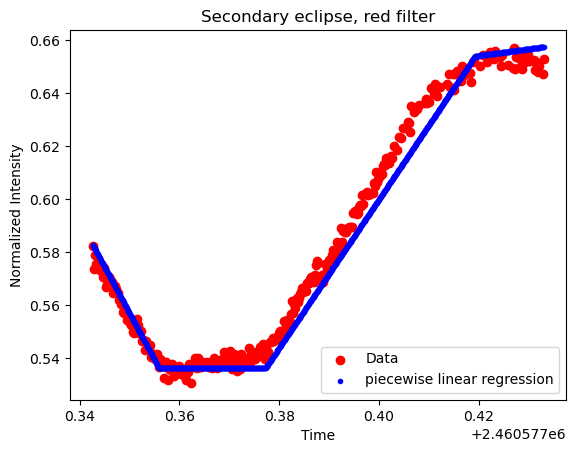

0.018811533741103927


In [26]:
# Pour s'assurer qu'on a bien les bonnes données dans les fonctions
# utilisant des variables globales.
x_arr = x_sec_r
y_arr = y_sec_r

# On insère les paramètres obtenus manuellement dans l'algorithme, qui fait sa régression linéaire par morceaux
p_sec_r , e_sec_r = optimize.curve_fit(eclipse_fit, x_sec_r, y_sec_r,
                           sigma=y_sec_r_err, check_finite=True,
                           method='dogbox',
                           nan_policy='omit',
                           bounds=(params_sec_r - 0.25,
                                   params_sec_r + 0.25),
                           maxfev=1000)
perr_sec_r = np.sqrt(np.diag(e_sec_r))

fx_sec_r2 = np.linspace(x_sec_r[0], x_sec_r[-1], 1000)
fy_sec_r2 = eclipse_fit(fx_sec_r2, *p_sec_r)

plot_wrapper([[x_sec_r, y_sec_r, 'Data', 'red', 'o'],
              [fx_sec_r2, fy_sec_r2, 'piecewise linear regression', 'blue', '.']],
             'Secondary eclipse, red filter', 'Time', 'Normalized Intensity', legend_loc='lower right')

print(chisquare(x_sec_r, y_sec_r, p_sec_r, eclipse_fit))

[5.81895341e-04 2.61418853e-05 2.15151532e-02 1.60818795e+03
 5.27600900e-02 1.71516896e+00 1.15293321e+05]


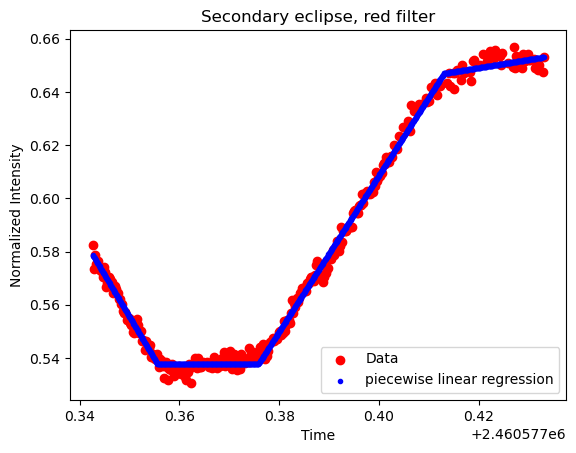

0.003474905458129962


In [27]:
# Pour s'assurer qu'on a bien les bonnes données dans les fonctions
# utilisant des variables globales.
x_arr = x_sec_r
y_arr = y_sec_r

# On utilise un algorithme génétique pour tenter de trouver le minimum global permettant d'optimiser les paramètres initiaux
initialParams_arr = [[params_sec_r[0]-0.3, params_sec_r[0]+0.3],
                     [params_sec_r[1]-0.5, params_sec_r[1]+0.5],
                     [params_sec_r[2]-0.5, params_sec_r[2]+0.5],
                     [params_sec_r[3]-0.5, params_sec_r[3]+0.5],
                     [params_sec_r[4]-3, params_sec_r[4]+3],
                     [params_sec_r[5]-3, params_sec_r[5]+3],
                     [params_sec_r[6]-3, params_sec_r[6]+3]]

initialParams = optimize.differential_evolution(error_function, initialParams_arr, seed=1).x

# On insère les paramètres obtenus dans l'algorithme, qui fait sa régression linéaire par morceaux
p_sec_r , e_sec_r = optimize.curve_fit(eclipse_fit, x_sec_r, y_sec_r,
                           sigma=y_sec_r_err, check_finite=True,
                           method='dogbox',
                           nan_policy='omit',
                           p0=initialParams,
                           maxfev=10000)
perr_sec_r = np.sqrt(np.diag(e_sec_r))
print(perr_sec_r)

fx_sec_r2 = np.linspace(x_sec_r[0], x_sec_r[-1], 1000)
fy_sec_r2 = eclipse_fit(fx_sec_r2, *p_sec_r)

plot_wrapper([[x_sec_r, y_sec_r, 'Data', 'red', 'o'],
              [fx_sec_r2, fy_sec_r2, 'piecewise linear regression', 'blue', '.']],
             'Secondary eclipse, red filter', 'Time', 'Normalized Intensity', legend_loc='lower right')


print(chisquare(x_sec_r, y_sec_r, p_sec_r, eclipse_fit))

# Calcul du ratio des rayons

In [29]:
# Delta T de la pente descendante de l'éclipse primaire dans le filtre rouge
deltaT1 = (p_pri_r[2]-p_pri_r[1])*24*3600
deltaT1_err = np.sqrt(perr_pri_r[2]**2+perr_pri_r[1]**2)*24*3600
print(deltaT1, "+-", deltaT1_err)

3930.202178657055 +- 72.70535494135349


In [30]:
# Delta T de la pente ascendante de l'éclipse primaire dans le filtre rouge
deltaT2_1 = (p_pri_r[4]-p_pri_r[2])*24*3600
deltaT2_1_err = np.sqrt(perr_pri_r[4]**2+perr_pri_r[2]**2)*24*3600
print(deltaT2_1, "+-", deltaT2_1_err)

4993.378829956055 +- 185777913.77336127


In [31]:
# Delta T de la pente ascendante de l'éclipse secondaire dans le filtre rouge
deltaT2_2 = (p_sec_r[3]-p_sec_r[1])*24*3600
deltaT2_2_err = np.sqrt(perr_sec_r[3]**2+perr_sec_r[1]**2)*24*3600
print(deltaT2_2, "+-", deltaT2_2_err)

4969.257335364819 +- 138947438.80218288


In [32]:
# Delta T de la pente ascendante de l'éclipse secondaire dans le filtre vert
deltaT2_3 = (p_sec_g[3]-p_sec_g[1])*24*3600
deltaT2_3_err = np.sqrt(perr_sec_g[3]**2+perr_sec_g[1]**2)*24*3600
print(deltaT2_3, "+-", deltaT2_3_err)

5182.128319144249 +- 21.736857244761982


In [33]:
print(perr_sec_g)
print(perr_sec_r)
print(perr_pri_r)

[0.00043687 0.00015657 0.00065959 0.00019693 0.02086208 0.05765076
 0.01167683]
[5.81895341e-04 2.61418853e-05 2.15151532e-02 1.60818795e+03
 5.27600900e-02 1.71516896e+00 1.15293321e+05]
[2.43036830e-04 8.41091688e-04 2.61199088e-05 5.05404717e-03
 2.15020734e+03 5.51595453e-02 3.83606778e-01 1.15689501e+05]


In [34]:
deltaT2 = (deltaT2_1+deltaT2_2+deltaT2_3)/3
deltaT2_err = (deltaT2_1_err+deltaT2_2_err+deltaT2_3_err)
print(deltaT2, "+-", deltaT2_err)

5048.254828155041 +- 324725374.31240135


In [35]:
radius_ratio = deltaT1/deltaT2_3
radius_ratio_err = np.sqrt(((1/deltaT2_3)**2)*(deltaT1_err**2)+((deltaT1/(deltaT2_3**2))**2)*(deltaT2_3_err**2))
print(radius_ratio, "+-", radius_ratio_err)

0.7584146776408016 +- 0.014386161696281227


In [36]:
# Valeurs tabulées : 1,286 ± 0,011 R☉ / 0,956 ± 0,012 R☉
print(0.956/1.286, "+-", np.sqrt(((1/1.286)**2)*0.012**2+((0.956/(1.286**2))**2)*0.011**2))

0.7433903576982892 +- 0.01129183467662313


# Calcul du ratio des masses

In [38]:
I1 = fy_pri_r2[500]
I1_err = np.mean(y_pri_r_err)
print(I1, "+-", I1_err)

0.5471019742255339 +- 0.04881799870547372


In [39]:
I2 = fy_sec_r2[180]
I2_err = np.mean(y_sec_r_err)

print(I2, "+-", I2_err)

0.5378255549208731 +- 0.04109242895349106


In [40]:
I3 = fy_sec_g2[190]
I3_err = np.mean(y_sec_g_err)

print(I3, "+-", I3_err)

0.17933704639464082 +- 0.08358841389563683


In [41]:
mass_ratio = np.power(I3/I1, 1/4)
mass_ratio_err = np.sqrt(((1/(4*np.power(I3, 3/4)*np.power(I1, 1/4)))**2)*(I3_err**2)
                        +((np.power(I3, 1/4)/(4*np.power(I1, 5/4)))**2)*(I1_err**2))
print(mass_ratio, "+-", mass_ratio_err)

0.756659401791714 +- 0.08977027189709837


In [42]:
# Valeurs tabulées : 1,088 ± 0,030 M☉ / 0,837 ± 0,030 M☉
print(0.837/1.088, "+-", np.sqrt(((1/1.088)**2)*0.030**2+((0.837/(1.088**2))**2)*0.030**2))

0.7693014705882352 +- 0.03478884306905212
